# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [14]:
import numpy as np 
import random 

def browniano_x(pos, t, i):
    x_i = [1, -1]
    dt = np.sqrt(i)
    w_i = [pos]
    for i in range (round(t / i)) :
        w_i.append((w_i[-1]) + (random.choice(x_i) * dt))
    return w_i

def browniano_y(pos, t, i):
    x_i = [1, -1]
    dt = np.sqrt(i)
    w_i = [pos]
    for i in range (round(t / i)) :
        w_i.append((w_i[-1]) + (random.choice(x_i) * dt))
    return w_i

def browniano_z(pos, t, i):
    x_i = [1, -1]
    dt = np.sqrt(i)
    w_i = [pos]
    for i in range (round(t / i)) :
        w_i.append((w_i[-1]) + (random.choice(x_i) * dt))
    return w_i


In [33]:
x = browniano_x(0, 20, 0.001)
y = browniano_y(0, 20, 0.001)
z = browniano_z(0, 20, 0.001)

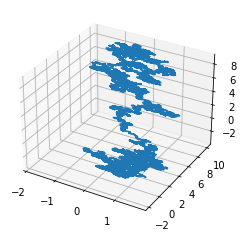

In [34]:
import matplotlib.pyplot as plt 

R3 = plt.figure()
ejes = R3.add_subplot(111, projection = '3d')
X = np.array([x])
Y = np.array([y])
Z = np.array([z])

ejes.plot_wireframe(X, Y, Z)



#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import random 
import numpy as np
moneda = [-1, 1]
def apuesta() :
    c_i = 20
    R = [c_i]
    while R[-1] > 0 :
        caraocruz = random.choice(moneda)
        a = R[-1]
        if a <= 0 :
            break
        if caraocruz == -1 and (a >= 6) :
            a = a - (a / 2)
            R.append(a)
        if caraocruz == 1 and (a >= 6) :
            a = a - (a / 2)
            R.append(a)  
        if caraocruz == -1 and (a < 6) :
            R.append(a - 2)
        if caraocruz == 1 and (a < 6) :
            R.append(a + 2)
    return R

### En la siguiente parte del código, se puede ver que el apostador tuvo que tomar lo que son los 6 volados para perder todo el capital 

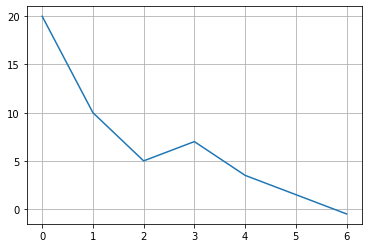

In [40]:
y = apuesta()
x = np.arange(0, len(y))
plt.figure()
plt.plot(x,y)
plt.grid()


### En esta parte se hará lo que es el promedio de volados para quedar en quiebra y se obtuvo como resultado una media de 13 para que 10,000 apostadores queden en quiebra

In [44]:
def apostador(m) :
    a = []
    for i in range(m) :
        a.append(len(apuesta())-1)
    return a
media = round(np.mean(apostador(100000)))

In [43]:
media 

13

### Nuestro Histograma

(array([6.315e+03, 2.304e+03, 8.440e+02, 3.360e+02, 1.150e+02, 5.500e+01,
        1.900e+01, 8.000e+00, 3.000e+00, 1.000e+00]),
 array([ 5. , 12.8, 20.6, 28.4, 36.2, 44. , 51.8, 59.6, 67.4, 75.2, 83. ]),
 <BarContainer object of 10 artists>)

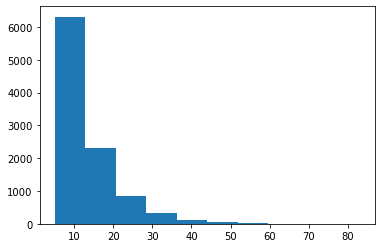

In [46]:
numerovolados = np.array(apostador(10000))
plt.figure()
plt.hist(p)